In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import os
from sys import platform
from matplotlib import rc
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import itertools

# from jupyterthemes import jtplot
# jtplot.style(context='talk', fscale=2, spines=False, gridlines='--', )


# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
# rc('figure', figsize=(10,5))

import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
if (platform == 'linux2') or (platform == 'linux'):
    home = '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/'
elif platform == 'darwin': 
    home = '/Users/i_67981492/dynamic_decision_policy_reconfiguration/'
    
print(platform, home)

('linux2', '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/')


In [3]:
write_dir = os.path.join(home, 'analysis_revision/loki0.5_acc_av_models/manifold_estimation/'); print(write_dir)

/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/analysis_revision/loki0.5_acc_av_models/manifold_estimation/


In [4]:
av_polar_est_df = pd.read_csv(os.path.join(write_dir, 'av_polar_est_df.csv'))

In [5]:
av_polar_est_df.head()

,mcmc_iteration,shifted_epoch_trial,v,v_est_z,a,a_est_z,r_z,theta_radians_z,theta_deg_z
0,0,-1.0,0.357331,0.767298,0.983536,0.438212,NaN,NaN,NaN
1,0,0.0,-0.475507,-1.907671,0.971127,-0.300620,2.775128,-1.840280,-105.440254
2,0,1.0,-0.072172,-0.612213,0.976214,0.002291,1.330402,1.341098,76.839243
3,0,2.0,0.347012,0.734153,0.947642,-1.698929,2.169528,2.472111,141.641503
4,0,3.0,0.371451,0.812649,0.991511,0.913071,2.613179,0.030043,1.721330


In [6]:
def plot_a_v_time(data, fig, ax, write_dir=write_dir, conditional=False, savefig=None,
all_subs=False, linestyle='-', legend=True,
pooled_mean=False, id_str=None, home=os.path.expanduser('~'), alpha=False):


    # hack to get hue to work with lineplots and markers ...

    fig_path=write_dir

    n_plotted_trials = data.shifted_epoch_trial.nunique()

    palette_seed = sns.color_palette('Greens', n_colors=200)[80::10]

    assert len(palette_seed) >= n_plotted_trials, 'check n_colors for color palette'

    palette = itertools.cycle(palette_seed)

    sns.lineplot(data=data, x='a_est_z', y='v_est_z', hue='shifted_epoch_trial', 
                 palette=palette_seed[:n_plotted_trials], marker='o');

    
    
    x = data.a_est_z
    y = data.v_est_z
    
    if alpha:

        for i in range(len(data)):
            plt.plot(x.values[i:i+2], y.values[i:i+2], color=next(palette), linestyle=linestyle, linewidth=2.5,
                    alpha=0.3)

    else: 
        
        for i in range(len(data)):
            plt.plot(x.values[i:i+2], y.values[i:i+2], color=next(palette), linestyle=linestyle, linewidth=2.5)
    
    if conditional is True:
        plt.title('subject ' + str(int(data.subj_id.unique()[0])) + ': ' +
                '$\lambda =$ ' + str(int(data.lambda_val.unique()[0])) + ' p = ' + str(data.p_optimal.unique()[0]), fontsize=20)
        fig_name = (id_str + str(int(data.subj_id.unique()[0])) + '_' + str(int(data.condition.unique()[0])) +'_a_v_time_color.png')
    if all_subs is True:
        fig_name = (id_str + 'all_conditions_all_subs_a_v_time_color.png')
    if pooled_mean is True:
        fig_name = (id_str + 'mean_a_v_time_color.png')

    # else:
    #     plt.title('subject ' + str(int(data.subj_id.unique()[0])), fontsize=20)
    #     fig_name = (str(int(data.subj_id.unique()[0])) +'_all_conditions_a_v_time_color.png')


    plt.xlabel(r'Boundary height ($\hat{a}$)')
    plt.ylabel(r'Drift rate ($\hat{v}$)')

    if legend:
        legend = ax.legend()
        legend.texts[0].set_text("epoch trial")
    else:
        ax.get_legend().remove()


    if savefig:

        plt.savefig(os.path.join(fig_path, fig_name))


    return fig, ax

In [7]:
av_polar_est_df.loc[av_polar_est_df.shifted_epoch_trial == -1].r_z.unique()

array([nan])

In [8]:
mean_av_df = av_polar_est_df.groupby(['shifted_epoch_trial'])[['a_est_z', 'v_est_z']].mean().reset_index() # only plot t-1-3

mean_av_df.head()

,shifted_epoch_trial,a_est_z,v_est_z
0,-1.0,-0.018632,0.648173
1,0.0,0.061755,-1.603853
2,1.0,0.234660,-0.638723
3,2.0,-0.802722,0.649204
4,3.0,0.524939,0.945198


In [9]:

# plot_a_v_time(av_polar_est_df, fig, ax, conditional=False, savefig=True,
# all_subs=True, pooled_mean=True, legend=False, id_str='loki_0_')

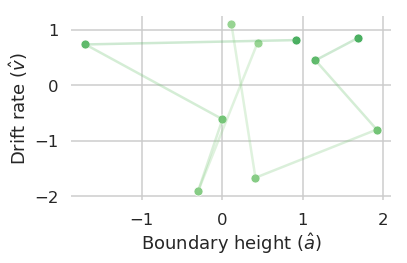

In [10]:
sns.set_context("talk", font_scale=1)

sns.set_style('whitegrid')

fig, ax = plt.subplots()

for it in av_polar_est_df.mcmc_iteration.unique()[:2]:
    
    dat = av_polar_est_df.loc[av_polar_est_df.mcmc_iteration == it].copy()


    plot_a_v_time(dat, fig, ax, conditional=False, savefig=True
                  ,
    all_subs=True, pooled_mean=True, legend=False, id_str='loki_0_', alpha=True)

sns.despine(left=True, bottom=True)
plt.tight_layout()
# plt.savefig(os.path.join(write_dir, 'loki0.5_manifold_avg.png'))

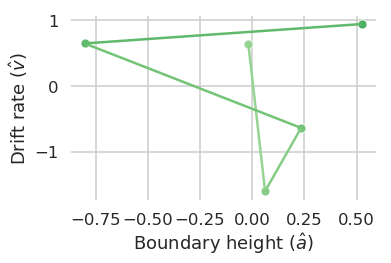

In [11]:
sns.set_context("talk", font_scale=1)

sns.set_style('whitegrid')

fig, ax = plt.subplots()

plot_a_v_time(mean_av_df, fig, ax, conditional=False, savefig=True,
all_subs=True, pooled_mean=True, legend=False, id_str='loki_0_')

sns.despine(left=True, bottom=True)
plt.tight_layout()
# plt.axis('equal')
plt.savefig(os.path.join(write_dir, 'loki0.5_manifold_avg.pdf'))